In [ ]:
## Hands-On Material 6
- `Dataset` : https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Bagian 1: Klasifikasi Biner (Memprediksi 'target' Penyakit Jantung)

In [4]:
# Load dataset
data_binary = pd.read_csv('dataset/heart_cleveland_upload.csv') 

# Preprocessing - memilih fitur dan target, lalu menghapus baris null
data_binary = data_binary[['age', 'chol', 'condition']].dropna()

X_binary_heart = data_binary[['age', 'chol']]
y_binary_heart = data_binary['condition']

# Split the data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_binary_heart, y_binary_heart, test_size=0.2, random_state=42
)

# Standardize the features
scaler_binary = StandardScaler()
X_train_bin = scaler_binary.fit_transform(X_train_bin)
X_test_bin = scaler_binary.transform(X_test_bin)

In [5]:
# 1.1 Linear SVM
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train_bin, y_train_bin)
y_pred_linear_bin = linear_svm.predict(X_test_bin)

# Display evaluation metrics for Linear SVM
print("--- Evaluasi Model Biner: Linear SVM (Heart Disease) ---")
linear_acc_bin = accuracy_score(y_test_bin, y_pred_linear_bin)
print(f"Accuracy: {linear_acc_bin:.2f}")
print(classification_report(y_test_bin, y_pred_linear_bin))

--- Evaluasi Model Biner: Linear SVM (Heart Disease) ---
Accuracy: 0.57
              precision    recall  f1-score   support

           0       0.64      0.44      0.52        32
           1       0.53      0.71      0.61        28

    accuracy                           0.57        60
   macro avg       0.58      0.58      0.56        60
weighted avg       0.59      0.57      0.56        60



In [6]:
# 1.2 Non-Linear SVM (RBF Kernel)
nonlinear_svm = SVC(kernel='rbf')
nonlinear_svm.fit(X_train_bin, y_train_bin)
y_pred_nonlinear_bin = nonlinear_svm.predict(X_test_bin)
nonlinear_acc_bin = accuracy_score(y_test_bin, y_pred_nonlinear_bin)

# Display evaluation metrics for Non-Linear SVM
print("\n--- Evaluasi Model Biner: Non-Linear SVM (RBF) (Heart Disease) ---")
print(f"Accuracy: {nonlinear_acc_bin:.2f}")
print(classification_report(y_test_bin, y_pred_nonlinear_bin))


--- Evaluasi Model Biner: Non-Linear SVM (RBF) (Heart Disease) ---
Accuracy: 0.57
              precision    recall  f1-score   support

           0       0.62      0.47      0.54        32
           1       0.53      0.68      0.59        28

    accuracy                           0.57        60
   macro avg       0.58      0.57      0.56        60
weighted avg       0.58      0.57      0.56        60



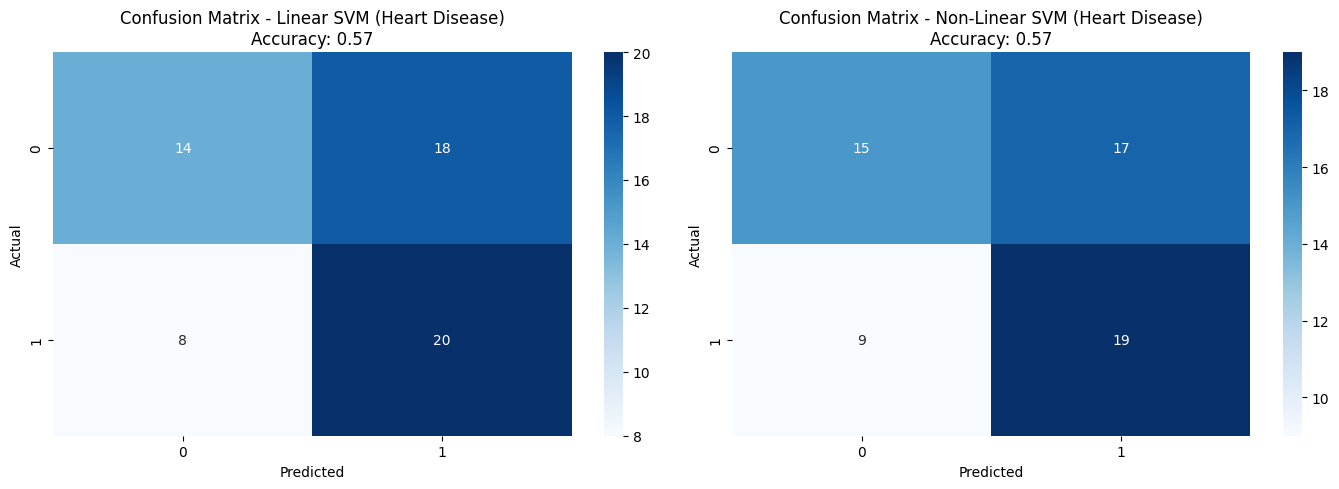

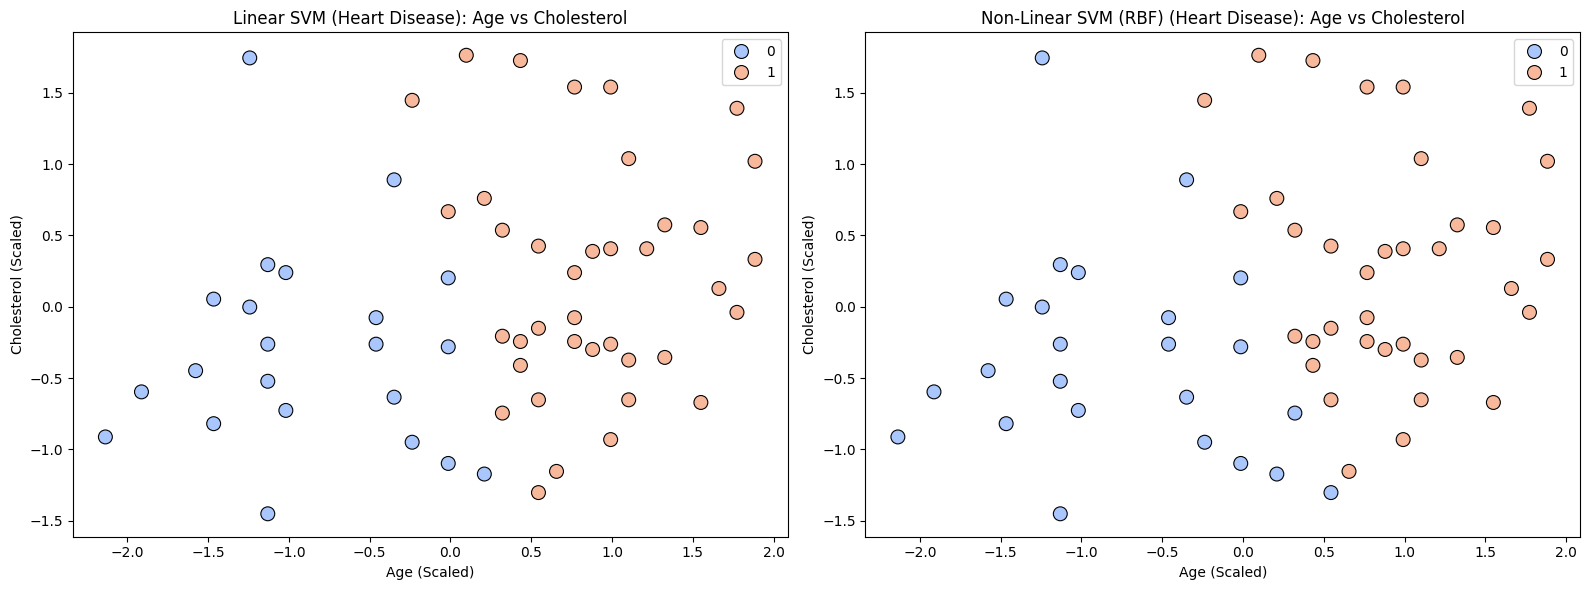

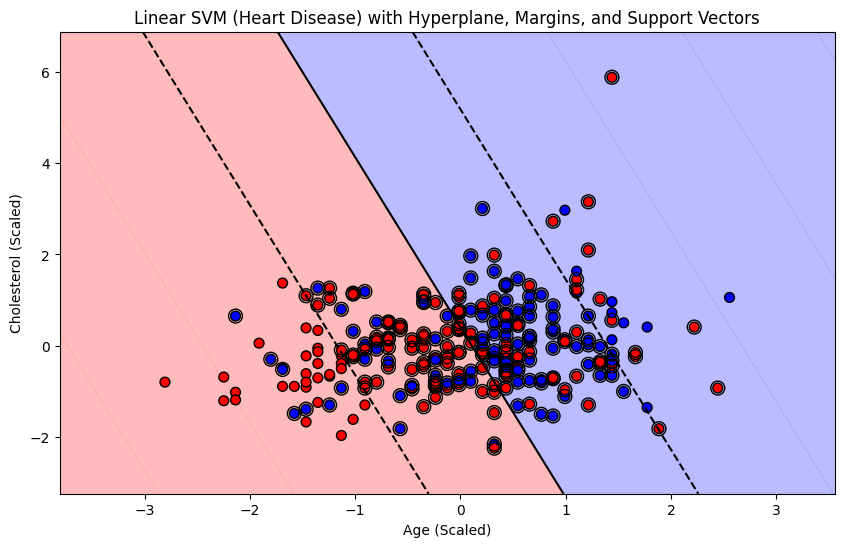

In [7]:
# 1. Plot Confusion Matrices (Linear vs Non-Linear)
cm_linear_bin = confusion_matrix(y_test_bin, y_pred_linear_bin)
cm_nonlinear_bin = confusion_matrix(y_test_bin, y_pred_nonlinear_bin)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_linear_bin, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - Linear SVM (Heart Disease)\nAccuracy: {linear_acc_bin:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_nonlinear_bin, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - Non-Linear SVM (Heart Disease)\nAccuracy: {nonlinear_acc_bin:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 2. Plot Scatter (Perbandingan Prediksi)
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test_bin[:, 0], y=X_test_bin[:, 1], hue=y_pred_linear_bin, palette='coolwarm', s=100, edgecolor='k')
plt.title('Linear SVM (Heart Disease): Age vs Cholesterol')
plt.xlabel('Age (Scaled)')
plt.ylabel('Cholesterol (Scaled)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test_bin[:, 0], y=X_test_bin[:, 1], hue=y_pred_nonlinear_bin, palette='coolwarm', s=100, edgecolor='k')
plt.title('Non-Linear SVM (RBF) (Heart Disease): Age vs Cholesterol')
plt.xlabel('Age (Scaled)')
plt.ylabel('Cholesterol (Scaled)')
plt.tight_layout()
plt.show()

# 3. Plot Hyperplane, Margins, dan Support Vectors (Hanya untuk Linear SVM)
plt.figure(figsize=(10, 6))
X_train_data = X_train_bin
y_train_data = y_train_bin

# Define plot boundaries
x_min, x_max = X_train_data[:, 0].min() - 1, X_train_data[:, 0].max() + 1
y_min, y_max = X_train_data[:, 1].min() - 1, X_train_data[:, 1].max() + 1

# Create grid to evaluate model
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                   np.arange(y_min, y_max, 0.02))

Z = linear_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])

plt.scatter(X_train_data[:, 0], X_train_data[:, 1], c=y_train_data, edgecolors='k', cmap=ListedColormap(['#FF0000', '#0000FF']), s=50)
plt.scatter(linear_svm.support_vectors_[:, 0], linear_svm.support_vectors_[:, 1],
            facecolors='none', edgecolors='k', s=100, marker='o')

plt.title('Linear SVM (Heart Disease) with Hyperplane, Margins, and Support Vectors')
plt.xlabel('Age (Scaled)')
plt.ylabel('Cholesterol (Scaled)')
plt.show()

### Bagian 2: Klasifikasi Multi-Kelas (Memprediksi 'cp' Tipe Nyeri Dada)

In [8]:
# Load dataset
data_multi = pd.read_csv('dataset/heart_cleveland_upload.csv')

# Preprocessing - memilih fitur ('age', 'chol') dan target ('cp')
data_multi = data_multi[['age', 'chol', 'cp']].dropna()
X_multi_heart = data_multi[['age', 'chol']]
y_multi_heart = data_multi['cp'] # Target ini memiliki 4 kelas (0, 1, 2, 3)

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi_heart, y_multi_heart, test_size=0.2, random_state=42
)

# Standardize the features
scaler_multi = StandardScaler()
X_train_multi = scaler_multi.fit_transform(X_train_multi)
X_test_multi = scaler_multi.transform(X_test_multi)

In [9]:
# 2.1 Multi-Class SVM with Linear Kernel
linear_svm_multi = SVC(kernel='linear', decision_function_shape='ovr')
linear_svm_multi.fit(X_train_multi, y_train_multi)
y_pred_linear_multi = linear_svm_multi.predict(X_test_multi)

# Display evaluation metrics
print("\n--- Evaluasi Model Multi-Kelas: Linear SVM (Heart Disease 'cp') ---")
print(f"Accuracy: {accuracy_score(y_test_multi, y_pred_linear_multi):.2f}")
print(classification_report(y_test_multi, y_pred_linear_multi))

# 2.2 Multi-Class SVM with Non-Linear Kernel (RBF)
nonlinear_svm_multi = SVC(kernel='rbf', decision_function_shape='ovr')
nonlinear_svm_multi.fit(X_train_multi, y_train_multi)
y_pred_nonlinear_multi = nonlinear_svm_multi.predict(X_test_multi)

# Display evaluation metrics
print("\n--- Evaluasi Model Multi-Kelas: Non-Linear SVM (RBF) (Heart Disease 'cp') ---")
print(f"Accuracy: {accuracy_score(y_test_multi, y_pred_nonlinear_multi):.2f}")
print(classification_report(y_test_multi, y_pred_nonlinear_multi))


--- Evaluasi Model Multi-Kelas: Linear SVM (Heart Disease 'cp') ---
Accuracy: 0.45
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        19
           3       0.45      1.00      0.62        27

    accuracy                           0.45        60
   macro avg       0.11      0.25      0.16        60
weighted avg       0.20      0.45      0.28        60


--- Evaluasi Model Multi-Kelas: Non-Linear SVM (RBF) (Heart Disease 'cp') ---
Accuracy: 0.43
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         9
           2       0.40      0.21      0.28        19
           3       0.45      0.81      0.58        27

    accuracy                           0.43        60
   macro avg       0.21      0.26      0.21        60
weighte

d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:17

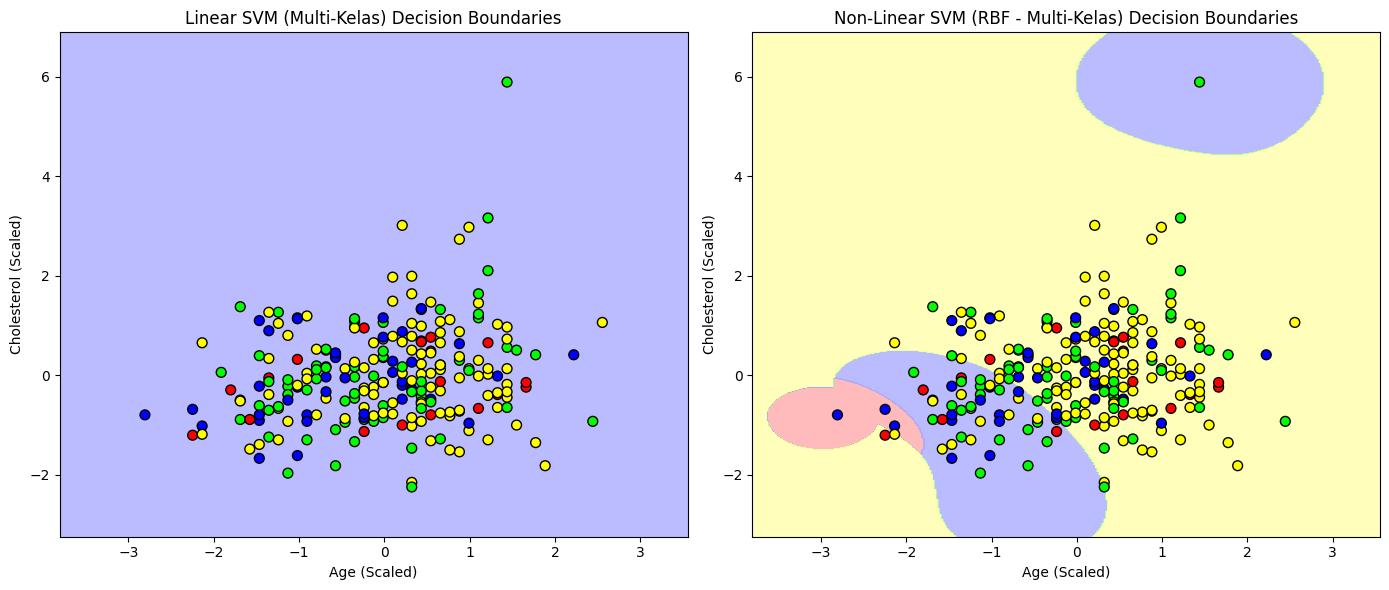

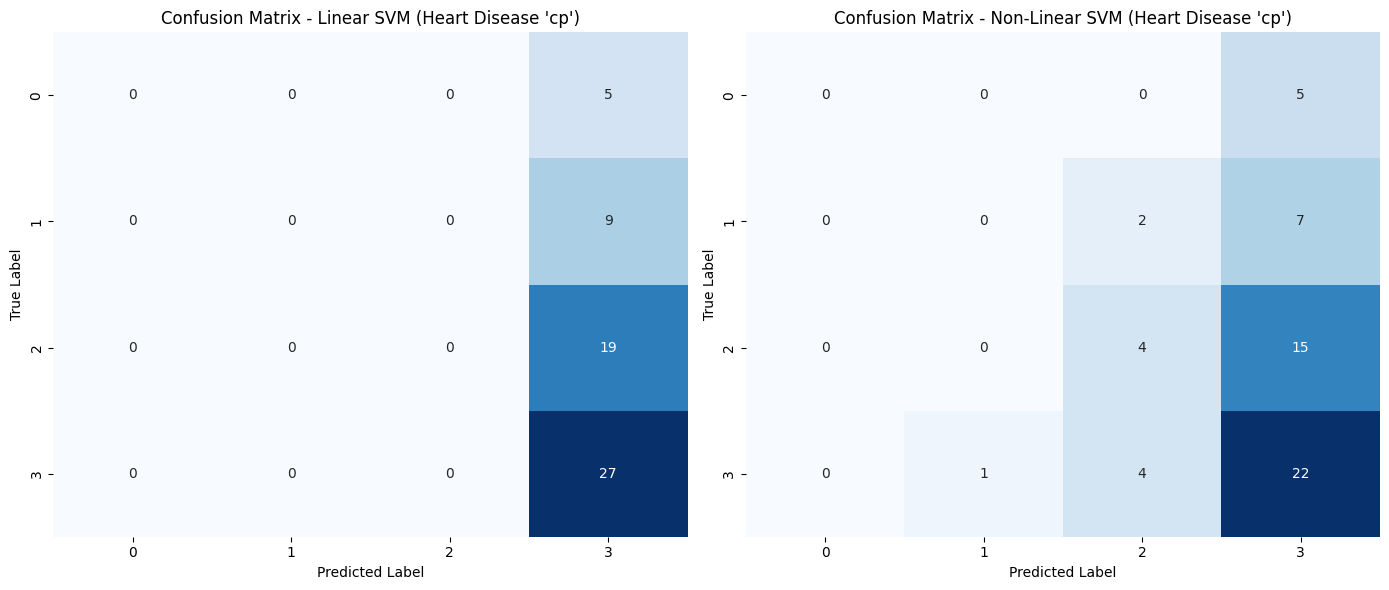

In [11]:
# Definisikan 4 warna untuk 4 kelas (0, 1, 2, 3)
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFFFAA']) # Merah, Biru, Hijau, Kuning (Halus)
cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00FF00', '#FFFF00']) # Merah, Biru, Hijau, Kuning (Tebal)

# 1. Plot Decision Boundaries (Multi-Kelas)
X_train_data_multi = X_train_multi
y_train_data_multi = y_train_multi

# Define plot boundaries
x_min, x_max = X_train_data_multi[:, 0].min() - 1, X_train_data_multi[:, 0].max() + 1
y_min, y_max = X_train_data_multi[:, 1].min() - 1, X_train_data_multi[:, 1].max() + 1

# Create grid to evaluate model
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                   np.arange(y_min, y_max, 0.02))

# Plotting
plt.figure(figsize=(14, 6))

# Plotting Linear SVM
plt.subplot(1, 2, 1)
Z = linear_svm_multi.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
plt.scatter(X_train_data_multi[:, 0], X_train_data_multi[:, 1], c=y_train_data_multi, edgecolors='k', cmap=cmap_bold, s=50)
plt.title('Linear SVM (Multi-Kelas) Decision Boundaries')
plt.xlabel('Age (Scaled)')
plt.ylabel('Cholesterol (Scaled)')

# Plotting Non-Linear SVM (RBF Kernel)
plt.subplot(1, 2, 2)
Z = nonlinear_svm_multi.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
plt.scatter(X_train_data_multi[:, 0], X_train_data_multi[:, 1], c=y_train_data_multi, edgecolors='k', cmap=cmap_bold, s=50)
plt.title('Non-Linear SVM (RBF - Multi-Kelas) Decision Boundaries')
plt.xlabel('Age (Scaled)')
plt.ylabel('Cholesterol (Scaled)')

plt.tight_layout()
plt.show()

# 2. Plot Confusion Matrices (Multi-Kelas)
cm_linear_multi = confusion_matrix(y_test_multi, y_pred_linear_multi)
cm_nonlinear_multi = confusion_matrix(y_test_multi, y_pred_nonlinear_multi)
class_labels = np.unique(y_multi_heart) # Akan berisi [0, 1, 2, 3]

plt.figure(figsize=(14, 6))

# Confusion Matrix for Linear SVM
plt.subplot(1, 2, 1)
sns.heatmap(cm_linear_multi, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Linear SVM (Heart Disease 'cp')")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Confusion Matrix for Non-Linear SVM
plt.subplot(1, 2, 2)
sns.heatmap(cm_nonlinear_multi, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Non-Linear SVM (Heart Disease 'cp')")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()